In [1]:
%pip install -e ..

Obtaining file:///home/rstudio/rl4greencrab
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached typing-3.7.4.3-py3-none-any.whl
  Building editable for rl4greencrab (pyproject.toml) ... done
  Created wheel for rl4greencrab: filename=rl4greencrab-1.0.0-py2.py3-none-any.whl size=1073 sha256=b125839fccc41947614acd0fb477a4cd383c45dfc4c4d3f62424b7ba0fe2f36b
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_sl330w/wheels/01/b3/9b/f19820538b59bf2d6fff135754c44d6024c68184a6dac19b71
Successfully built rl4greencrab
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install gym
%pip install optuna
%pip install rl_zoo3

  Using cached gym-0.26.2-py3-none-any.whl
  Using cached gym_notices-0.0.8-py3-none-any.whl.metadata (1.0 kB)
Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached optuna-4.0.0-py3-none-any.whl.metadata (16 kB)
Using cached optuna-4.0.0-py3-none-any.whl (362 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached rl_zoo3-2.3.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
  Using cached pytablewriter-1.2.0-py3-none-any.whl.metadata (37 kB)
  Using cached DataProperty-1.0.1-py3-none-any.whl.metadata (11 kB)
  Using cached mbstrdecoder-1.1.3-py3-none-any.whl.metadata (4.0 kB)
  Using cached pathvalidate-3.2.1-py3-none-any.whl.metadata (12 kB)
  Using cached tabledata-1.3.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached tcolorpy-0.1.6-py3-none-any.whl.metadata (6.4 kB)
  Using cached typepy-1.3.2-py3-none-any.whl.metada

In [2]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, geom_violin, facet_grid, labs, theme, facet_wrap

from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.env_util import make_vec_env

from rl4greencrab import simulator
import gym

import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_param_importances
import gymnasium as gym
import logging
import numpy as np

from gymnasium import spaces
#from scipy.stats import normx

import sample_params
from rl4greencrab import greenCrabSimplifiedEnv, simulator
from stable_baselines3.common.evaluation import evaluate_policy
from huggingface_hub import hf_hub_download, HfApi, login

In [3]:
config = {
        'action_reward_scale': np.array([0.08, 0.08, 0.4]),
        'max_action': 3000,
        # 'env_stoch': 0.,
        'trapm_pmax': 10 * 0.1 * 2.75e-5, #2.26e-6,
        'trapf_pmax': 10 * 0.03 * 2.75e-5, #8.3e-7,
        'traps_pmax': 10 * 2.75e-5, #2.75e-5,

        'loss_a': 0.2,
        'loss_b': 5,
        'loss_c': 5,
        
        'action_reward_exponent': 10,
    }

In [4]:
gcse = greenCrabSimplifiedEnv(config)
vec_env = make_vec_env(greenCrabSimplifiedEnv, n_envs=12)
evalEnv = greenCrabSimplifiedEnv(config)

In [4]:
login()

## PPO

In [35]:
model = PPO("MlpPolicy", vec_env, verbose=0, 
            batch_size =  64, 
            n_steps = 32, 
            gamma = 0.9999, 
            learning_rate = 0.020439420278073966, 
            ent_coef = 7.676877009214456e-07, 
            clip_range =  0.1, 
            n_epochs = 20, 
            gae_lambda = 0.9, 
            max_grad_norm = 5, 
            vf_coef = 0.9694540149524578, 
            policy_kwargs = dict(net_arch=[16,16]),
            tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps= 100, 
	progress_bar=True,
)
model.save("ppo_gcse_short")

Output()

In [7]:
hyperparameter = {'gamma': 0.9999, 
                  'learning_rate': 0.020439420278073966, 
                  'batch_size': 16, 
                  'buffer_size': 10000, 
                  'learning_starts': 0, 
                  'train_freq': 16, 
                  'tau': 0.05, 
                  'log_std_init': -2.392885376919297, 
                  'net_arch': 'big', 
                  'n_quantiles': 31, 
                  'top_quantiles_to_drop_per_net': 1}

In [13]:
ppoAgent = PPO.load("ppo_gcse_short")
# tunningAgent = TD3.load("tunning_best_gcse")
evalEnv = greenCrabSimplifiedEnv(config)

In [19]:
api = HfApi()
api.upload_file(
        path_or_fileobj="ppo_gcse_short.zip",
        path_in_repo="ppo_gcse_short.zip",
        repo_id="jimjiang203/greencrabPPO",
        repo_type="model",
    )

ppo_gcse_short.zip:   0%|          | 0.00/141k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jimjiang203/greencrabPPO/commit/71b09fb8baeb354a830ec9c9c1050a7680332d64', commit_message='Upload ppo_gcse_short.zip with huggingface_hub', commit_description='', oid='71b09fb8baeb354a830ec9c9c1050a7680332d64', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jimjiang203/greencrabPPO', endpoint='https://huggingface.co', repo_type='model', repo_id='jimjiang203/greencrabPPO'), pr_revision=None, pr_num=None)

In [14]:
mean_rew, std_rew = evaluate_policy(ppoAgent, evalEnv)
print(f"PPO reward = {mean_rew:.5f} +/- {std_rew:.5f}")

/opt/conda/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.


PPO reward = -0.00063 +/- 0.00000


In [56]:
ppoData = simulator(env = evalEnv, agent = ppoAgent).simulate_full_named_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
ppoDataDF.head()

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.000000,-1.000000,-1.0,-1.0,-0.488460,0.000000,0
1,1,-1.000000,-1.000000,-1.0,-1.0,-0.488460,-0.000005,0
2,2,-0.999896,-0.998514,-1.0,-1.0,-0.488453,-0.000010,0
3,3,-0.995126,-0.993067,-1.0,-1.0,-0.488412,-0.000014,0
4,4,-0.988741,-0.989236,-1.0,-1.0,-0.488369,-0.000019,0


<Axes: xlabel='t'>

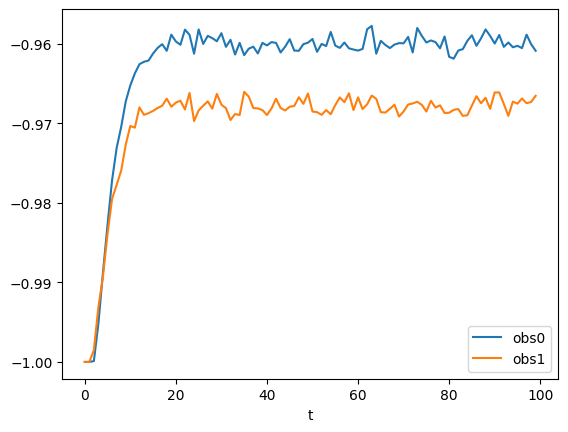

In [57]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0', 'obs1'])

<Axes: xlabel='t'>

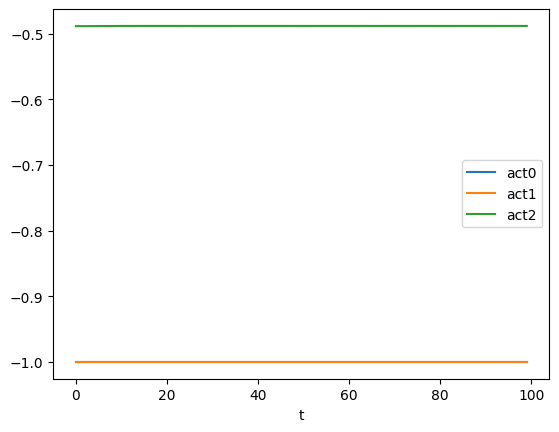

In [58]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

## TQC 

In [ ]:
"""model = TQC("MlpPolicy", 
            vec_env, 
            verbose=0, 
            gamma= 0.9999, 
            learning_rate = 0.020439420278073966, 
            batch_size = 16, 
            buffer_size = 10000, 
            learning_starts= 0, 
            train_freq = 16, 
            tau = 0.05, 
            top_quantiles_to_drop_per_net = 1)"""
model = TQC("MlpPolicy", gcse, verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=200_000,
	progress_bar=True
)
model.save("tqc_gcse_short")

In [5]:
tqcAgent = TQC.load("tqc_gcse_short")
mean_rew, std_rew = evaluate_policy(tqcAgent, evalEnv)
print(f"TQC reward = {mean_rew:.5f} +/- {std_rew:.5f}")

/opt/conda/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.


TQC reward = -0.00070 +/- 0.00000


In [7]:
api.upload_file(
        path_or_fileobj="tqc_gcse_short.zip",
        path_in_repo="tqc_gcse_short.zip",
        repo_id="jimjiang203/greencrabPPO",
        repo_type="model",
    )

NameError: name 'api' is not defined

(   t      obs0      obs1      act0      act1      act2       rew  rep
 0  0 -1.000000 -1.000000 -0.582507 -0.515753 -0.480634  0.000000    0
 1  1 -1.000000 -1.000000 -0.582507 -0.515753 -0.480634 -0.000006    0
 2  2 -0.999981 -0.999231 -0.582442 -0.515689 -0.480596 -0.000013    0
 3  3 -0.998105 -0.997308 -0.582118 -0.515378 -0.480404 -0.000019    0
 4  4 -0.995968 -0.995622 -0.581791 -0.515065 -0.480210 -0.000025    0,
 <Axes: xlabel='t'>,
 <Axes: xlabel='t'>)

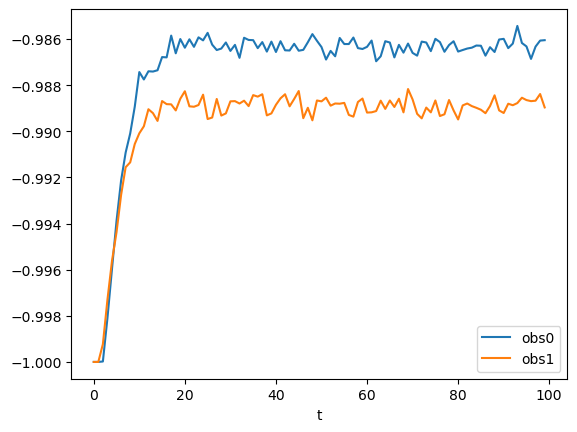

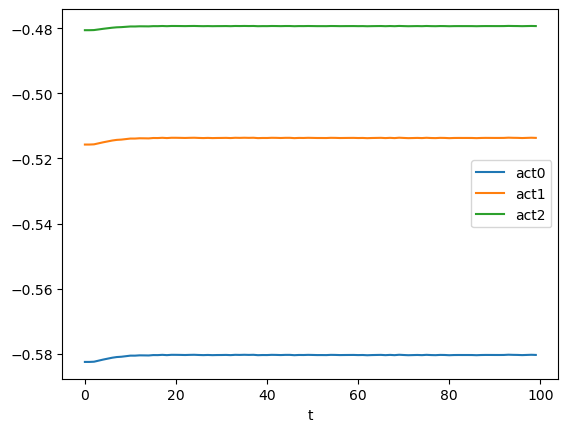

In [6]:
tqcData = simulator(env = evalEnv, agent = tqcAgent).simulate_full_named_obs_acts()
tqcDataDF = pd.DataFrame(tqcData)
(
    tqcDataDF.head(),
    tqcDataDF[tqcDataDF.rep == 0].plot(x='t', y =['obs0', 'obs1']),
    tqcDataDF[tqcDataDF.rep == 0].plot(x='t', y =['act0','act1','act2']),
)

## TD3

In [5]:
model = TD3("MlpPolicy", gcse, verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=250_000, 
	progress_bar=True,
)
model.save("td3_gcse_short")

Output()

In [20]:
api.upload_file(
        path_or_fileobj="td3_gcse_short.zip",
        path_in_repo="td3_gcse_short.zip",
        repo_id="jimjiang203/greencrabPPO",
        repo_type="model",
    )

td3_gcse_short.zip:   0%|          | 0.00/5.94M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jimjiang203/greencrabPPO/commit/75543b3f463de3fd2905a79aff0c1d59cb2fa354', commit_message='Upload td3_gcse_short.zip with huggingface_hub', commit_description='', oid='75543b3f463de3fd2905a79aff0c1d59cb2fa354', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jimjiang203/greencrabPPO', endpoint='https://huggingface.co', repo_type='model', repo_id='jimjiang203/greencrabPPO'), pr_revision=None, pr_num=None)

In [52]:
td3Agent = TD3.load("td3_gcse_short")
mean_rew, std_rew = evaluate_policy(td3Agent, evalEnv)
print(f"TD3 reward = {mean_rew:.5f} +/- {std_rew:.5f}")

/opt/venv/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.


TD3 reward = -0.00151 +/- 0.00000


(<Axes: xlabel='t'>, <Axes: xlabel='t'>)

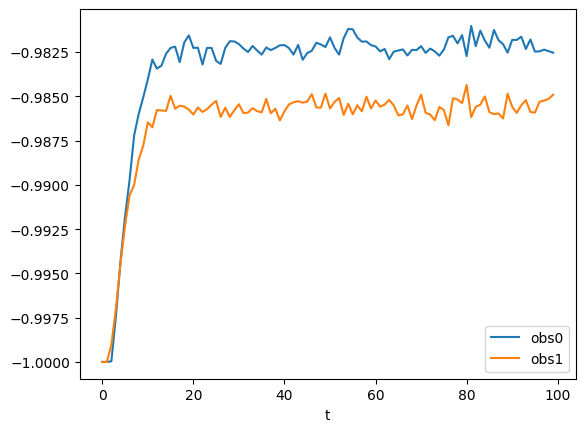

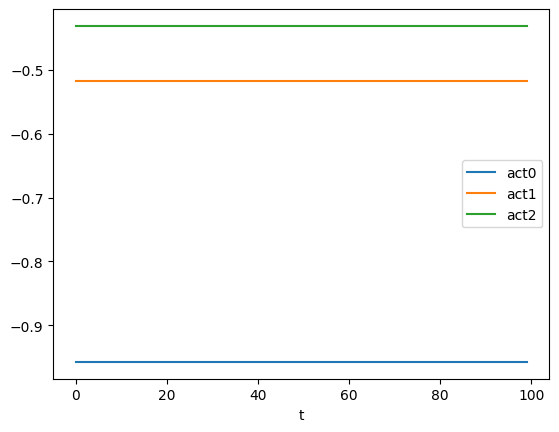

In [50]:
td3Data = simulator(env = evalEnv, agent = td3Agent).simulate_full_named_obs_acts()
td3DataDF = pd.DataFrame(td3Data)
(
    td3DataDF[td3DataDF.rep == 0].plot(x='t', y =['obs0', 'obs1']),
    td3DataDF[td3DataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2']),
)

### Recurrent PPO

In [26]:
lstm_ppo = RecurrentPPO.load(
    "recurrent_ppo_greencrab_long", 
    env=evalEnv, 
    device='cpu',
)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [30]:
api.upload_file(
        path_or_fileobj="recurrent_ppo_greencrab_long.zip",
        path_in_repo="recurrent_ppo_greencrab_long.zip",
        repo_id="jimjiang203/greencrabPPO",
        repo_type="model",
    )

recurrent_ppo_greencrab_long.zip:   0%|          | 0.00/6.93M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jimjiang203/greencrabPPO/commit/37f5df51da42fc02519fdbf198c8fb2400eea403', commit_message='Upload recurrent_ppo_greencrab_long.zip with huggingface_hub', commit_description='', oid='37f5df51da42fc02519fdbf198c8fb2400eea403', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jimjiang203/greencrabPPO', endpoint='https://huggingface.co', repo_type='model', repo_id='jimjiang203/greencrabPPO'), pr_revision=None, pr_num=None)

In [29]:
mean_reward, std_reward = evaluate_policy(lstm_ppo, evalEnv, n_eval_episodes=20, warn=False)
print(f"Recurrent_PPO reward = {mean_reward:.5f} +/- {std_reward:.5f}")

Recurrent_PPO reward = -0.00046 +/- 0.00001


## Constant Action

In [14]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_density, geom_line, geom_point, 
    geom_violin, facet_grid, labs, theme, facet_wrap,
)
from rl4greencrab import greenCrabEnv, greenCrabSimplifiedEnv
from rl4greencrab import simulator, constAction, multiConstAction, constActionNatUnits, evaluate_agent
from skopt import gp_minimize, gbrt_minimize 
from skopt.plots import plot_convergence, plot_objective

In [19]:
def evaluateConstAct(x):
    config = {
        'action_reward_scale': np.array([0.08, 0.08, 0.4]),
        'max_action': 3000,
        # 'env_stoch': 0.,
        'trapm_pmax': 10 * 0.1 * 2.75e-5, #2.26e-6,
        'trapf_pmax': 10 * 0.03 * 2.75e-5, #8.3e-7,
        'traps_pmax': 10 * 2.75e-5, #2.75e-5,

        'loss_a': 0.2,
        'loss_b': 5,
        'loss_c': 5,
        
        'action_reward_exponent': 10,
    }
    env = greenCrabEnv(config=config)
    agent = multiConstAction(env=env, action=np.array(x))
    # rewards = simulator(env, agent).simulate()
    # out = np.mean(rewards)
    m_reward = evaluate_agent(agent=agent, ray_remote=True).evaluate(n_eval_episodes=200)
    print(m_reward)
    return - m_reward

In [ ]:
%%time
max_action = 3000
res = gp_minimize(evaluateConstAct, 3*[(0.0, max_action)], n_calls = 100, verbose=True)
res.x

In [20]:
evaluateConstAct(
    [477, 516, 644]
)
# [0.0, 3.3306690738754696e-13, 0.0]

-2.837943099992774e-05


2.837943099992774e-05

In [30]:
ep_rew = 0
for i in range(100):
    observation, reward, terminated, truncated, info = gcse.step(np.array([0.0, 3.3306690738754696e-13, 0.0]))
    ep_rew += reward

In [31]:
ep_rew

-99981.84222500451